Работу выполнил 
Иванов Серафим Кириллович 0392, варинат 72

## Цель работы
Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных
аддитивных цепочек для заданного числа, привить навык использования
систем компьютерной математики для реализации алгоритмов.

## Постановка задачи
Реализовать точные и приближённые алгоритмы нахождения минимальных аддитивных цепочек с использованием системы компьютерной математики SageMath, провести анализ алгоритмов. Полученные результаты
содержательно проинтерпретировать.

## 1)  Построим несколько цепочек для $n \geqslant 30$ вручную

$ n = 1350 $
* Бинарный метод: 
$n = 10101000110_2$

Действие | К-во операций
--- | --- 
$(x)^2x^0 = x^2$ | 1
$(x)^2x = x^5$ | 2
$(x^5)^2x^0 = x^{10}$ | 1
$(x^{10})^2x = x^{21}$ | 2
$(x^{21})^2x^0 = x^{42}$ | 1
$(x^{42})^2x^0 = x^{84}$ | 1
$(x^{84})^2x^0 = x^{168}$ | 1
$(x^{186})^2x = x^{337}$ | 2
$(x^{337})^2x = x^{675}$ | 2
$(x^{675})^2x^0 = x^{1350}$ | 1

Итого $k = 14$

* Метод множителей:
$ n = 1350 = 2\cdot3^3\cdot5^2$
$x^n = (((((x^5)^5)^3)^3)^3)^2$
откуда количество операций $k = 13$

n = 1001
* Бинарный метод:
$n = 1111101001_2$

Действие | К-во операций
--- | --- 
$(x)^2x = x^3$ | 2
$(x^3)^2x = x^7$ | 2
$(x^7)^2x = x^{15}$ | 2
$(x^{15})^2x = x^{31}$ | 2
$(x^{31})^2x^0 = x^{62}$ | 1
$(x^{62})^2x = x^{125}$ | 2
$(x^{125})^2x^0 = x^{250}$ | 1
$(x^{250})^2x^0 = x^{500}$ | 1
$(x^{500})^2x = x^{1001}$ | 2

Итого $k = 15$
* Метод множителей:
$n = 1001 = 7\cdot11\cdot13 = (1 + 2\cdot3)(1+2\cdot5)(1+2^2\cdot3)$

Итого $k = 13$

Выводы:
* В среднем метод множителей несколько оптимальнее
* Не всегда метод множителей дает лучший результат, контрпример - 33
* Бинарный метод легко реализуем, а результаты не сильно отличются от глобально более оптимального метода множителей. Это делает его применимым.

## 2) Алгоритм Брауера

In [21]:
def Brauer(N, k):
    generate = []
    syst = []
    chain = []   
    tmpN = N
    p = 2**k
    syst.append([N, 0])
    while tmpN >= p:
        syst.append([tmpN//p, tmpN % p])
        tmpN //= p
    n = 1
    chain.append(n)
    last = len(syst) - 1
    while n < syst[last][0]:
        n += 1
        chain.append(n)
    last -= 1
    while n != N:
        if last < 0:
            print("There are some problem here...")
        while 2*n <= syst[last][0]:
            n *= 2
            chain.append(n)
        n += syst[last + 1][1]
        chain.append(n)
        last -= 1
    del(chain[-1])
    return chain

In [22]:
# построим какую-то цепочку для проверки
N = 1024
k = 9
lst = Brauer(N, k)
print(lst)
print("Len of chain is", len(lst))

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
Len of chain is 11


output:

    [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    Len of chain is 12

min len is 15 assuming k = 14


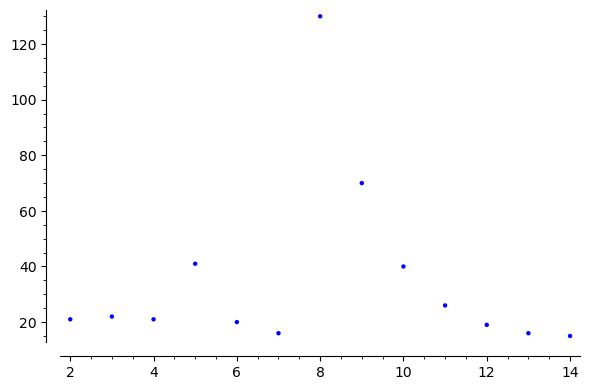

In [23]:
# проаналиируем зависимоать длины цепочки от k
# N менять
N = 31415
lst = []
for i in range(2, 30):
    lst.append(len(Brauer(N, i)))
print("min len is", min(lst), "assuming k =", lst.index(min(lst)) + 2)

g = point((i , lst[i - 2]) for i in range (2, 3 + lst.index(min(lst))))
g.show()

Согласно теории, оптимальное k для достаточно больших n опрелеляется, как k = λλ(n) - 2λλλ(n).
Проверим это

In [182]:
n = 1618033992434567890309877765443276543456784345678903456789098765432567
kk = math.log2(math.log2(n)) - math.log2(math.log2(math.log2(n)))
lst = []
for i in range(2, 10):
    lst.append(len(Brauer(n, i)))
print("min len is", min(lst), "assuming k =", lst.index(min(lst)) + 2)
print("theory says that the minimum is reached assuming k =", kk)

min len is 269 assuming k = 6
theory says that the minimum is reached assuming k = 4.873151751064757


output:

    min len is 269 assuming k = 6
    theory says that the minimum is reached assuming k = 4.873151751064757

In [183]:
for k in range(2, 14):
    fst6 = []
    for i in range(5000, 50000):
        fst6.append(len(Brauer(i, k)))
    print("k =", k, "min len is", min(fst6), "average aver =", sum(fst6)/len(fst6))

k = 2 min len is 19 average aver = 21.91591111111111
k = 3 min len is 17 average aver = 20.4432
k = 4 min len is 16 average aver = 21.21351111111111
k = 5 min len is 16 average aver = 25.7504
k = 6 min len is 15 average aver = 20.21351111111111
k = 7 min len is 17 average aver = 36.129955555555554
k = 8 min len is 28 average aver = 115.92177777777778
k = 9 min len is 19 average aver = 63.2112
k = 10 min len is 15 average aver = 37.35591111111111
k = 11 min len is 14 average aver = 24.927644444444443
k = 12 min len is 14 average aver = 19.21351111111111
k = 13 min len is 15 average aver = 483.69146666666666


output:

    k = 2 min len is 19 average aver = 21.91591111111111
    k = 3 min len is 17 average aver = 20.4432
    k = 4 min len is 16 average aver = 21.21351111111111
    k = 5 min len is 16 average aver = 25.7504
    k = 6 min len is 15 average aver = 20.21351111111111
    k = 7 min len is 17 average aver = 36.129955555555554
    k = 8 min len is 28 average aver = 115.92177777777778
    k = 9 min len is 19 average aver = 63.2112
    k = 10 min len is 15 average aver = 37.35591111111111
    k = 11 min len is 14 average aver = 24.927644444444443
    k = 12 min len is 14 average aver = 19.21351111111111
    k = 13 min len is 15 average aver = 483.69146666666666


В результате исследований замечено, что длина цепочки сильно зависит от выбранного k. Более того, метод оптимального выбора k для достаточно больших n: $k = λλ(n) - 2λλλ(n)$  не оправдал себя. Его результаты при вменяемых n меньше едниницы, а при действительно больших n не больше 2. как правило, минимум, полученный переборм, больше.
Среднее значение k, при коротом достигается минимум, колеблется от 5 (для больших чисел) до 15 (для относительно небольших.) Тем не менее, пренебрегая незначительными различиями в длинне внутри одного порядка, можно сказать, что оптимальное $k \in [3, 8]$

## Алгоритм Яо

In [ ]:
def YAO(N, k):
    syst = []
    chain = []
    tmpN = N
    p = 2**k
    z = []
    syst.append([N, 0])
    while tmpN >= p:
        syst.append([tmpN//p, tmpN % p])
        z.append(tmpN % p)
        tmpN //= p
    z.append(syst[len(syst) - 1][0])
    power = z
    z = list(set(z))
    z.sort()
    print("z =", z)
    d = []
    d_z = []
    for i in z:
        d_i = 0;
        for j in range(0, len(power)):
            if i == power[j]:
                d_i += (2**k)**j
        d.append(d_i)
        d_z.append(d_i*i)
    print("d(z) = ", d)
    print("z*d(z) = ", d_z)
    equal = 0
    for i in d_z:
        equal += i
    print(equal)
    chain = []
    first = int(log(N)/log(2))
    chain.append(1)
    for i in range(1, first + 1):
        chain.append(chain[i - 1]*2)
    print(chain)

In [13]:
N = int(input())
k = int(input())
YAO(N, k)

12
2


NameError: name 'YAO' is not defined

output:

    31415
    3
    z = [2, 5, 6, 7]
    d(z) =  [64, 512, 8, 4097]
    z*d(z) =  [128, 2560, 48, 28679]
    31415
    [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]

## 3) Алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа

In [2]:
def hamming(n):
    n = Integer(n)
    return n.popcount()

In [3]:
def generate_vec(m, ch_part):
    vec1 = []
    vec2 = []
    for i in range(1, m + 1):
        if i <= int(ch_part):# do not forgot to fix it
            vec1.append(i)
        else:
            vec2.append(i)
    return [vec1, vec2]

In [4]:
def get_num(vec):
    line = []
    line.append(1)
    for i in range(len(vec)):
        line.append(line[i] + line[vec[i] - 1])
    return line[len(line) - 1]

In [5]:
# decremenation
def dec(vec):
    _len = len(vec)
    for i in range(_len):
        if vec[_len - i - 1] > 1:
            vec[_len - i - 1] -= 1
            for j in range(_len - i, _len):
                vec[j] = j + 1
            break

In [6]:
def generate_part(_len, first):
    part = [0]*_len
    for i in range(_len):
        part[i] = first + i
    return part

In [7]:
def get_chain(vec):
    line = []
    line.append(1)
    for i in range(len(vec)):
        line.append(line[i] + line[vec[i] - 1])
    return line

In [8]:
def empty(vec):
    for i in vec:
        if i > 1:
            return False
    return True

In [9]:
def index(n):
    l_min = math.ceil(math.log2(n)) #minimum length
    l_max = int(math.log2(n) + hamming(n)) #maximum length
    for m in range(l_min, l_max):
        q = int(m/2)
        vec = generate_vec(m, q)
        #print(vec)
        static_part = generate_part(q, 1)
        
        while true: #sorting out all static parts
            dynamic_part = generate_part(m - q, q + 1)
            bounds = [0]*2
            a = get_num(static_part)
            bounds[0] = a + m - q
            bounds[1] = a * 2 ** (m - q)

            
            if n < bounds[0] or n > bounds[1]:
                if empty(static_part) and len(static_part) > 1:
                    break
                dec(static_part)
                continue
                
            while True: #sorting out all dynamic parts
                if get_num(static_part + dynamic_part) == n:
                    return static_part + dynamic_part
                if empty(dynamic_part):
                    break
                dec(dynamic_part)
                #print(static_part + dynamic_part)
            if empty(static_part):
                break
            dec(static_part)   
    print("Houston, we have a problem...")

In [10]:
import timeit
def calculate(N):
    start_time = timeit.default_timer()
    res = index(N)
    print("completed in", timeit.default_timer() - start_time, "seconds")
    return res

In [11]:
n = int(input()) #get a number to create our vector
ind = calculate(n)
print("Your vector is", ind)
print("Your chain is ", get_chain(ind))

123
completed in 0.09041466000053333 seconds
Your vector is [1, 1, 3, 4, 5, 6, 7, 6, 3]
Your chain is  [1, 2, 3, 6, 12, 24, 48, 96, 120, 123]


ex output:

    513
    completed in 0.00047584899948560633 seconds
    Your vector is [1, 2, 3, 4, 5, 6, 7, 8, 9, 1]
    Your chain is  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 513]

## 4) Проверим теорему (гипотезу) Шольца-Брауэра:

In [12]:
for i in range(1, 13):
    k = index(i)
    _k = index(2**i - 1)
    chain = get_chain(k)
    _chain = get_chain(_k)
    print("n =", i, ", l(n) =", len(chain), ", l(2^n - 1) =", len(_chain))
    print("l(2^n - 1) <= n - 1 + l(n): ", len(_chain) <= i - 1 + len(chain))
    print()

n = 1 , l(n) = 1 , l(2^n - 1) = 1
l(2^n - 1) <= n - 1 + l(n):  True

n = 2 , l(n) = 2 , l(2^n - 1) = 3
l(2^n - 1) <= n - 1 + l(n):  True

n = 3 , l(n) = 3 , l(2^n - 1) = 5
l(2^n - 1) <= n - 1 + l(n):  True

n = 4 , l(n) = 3 , l(2^n - 1) = 6
l(2^n - 1) <= n - 1 + l(n):  True

n = 5 , l(n) = 4 , l(2^n - 1) = 8
l(2^n - 1) <= n - 1 + l(n):  True

n = 6 , l(n) = 4 , l(2^n - 1) = 9
l(2^n - 1) <= n - 1 + l(n):  True

n = 7 , l(n) = 5 , l(2^n - 1) = 11
l(2^n - 1) <= n - 1 + l(n):  True

n = 8 , l(n) = 4 , l(2^n - 1) = 11
l(2^n - 1) <= n - 1 + l(n):  True

n = 9 , l(n) = 5 , l(2^n - 1) = 13
l(2^n - 1) <= n - 1 + l(n):  True

n = 10 , l(n) = 5 , l(2^n - 1) = 14
l(2^n - 1) <= n - 1 + l(n):  True

n = 11 , l(n) = 6 , l(2^n - 1) = 16
l(2^n - 1) <= n - 1 + l(n):  True

n = 12 , l(n) = 5 , l(2^n - 1) = 16
l(2^n - 1) <= n - 1 + l(n):  True



output:

    n = 1 , l(n) = 1 , l(2^n - 1) = 1
    l(2^n - 1) <= n - 1 + l(n):  True

    n = 2 , l(n) = 2 , l(2^n - 1) = 3
    l(2^n - 1) <= n - 1 + l(n):  True

    n = 3 , l(n) = 3 , l(2^n - 1) = 5
    l(2^n - 1) <= n - 1 + l(n):  True

    n = 4 , l(n) = 3 , l(2^n - 1) = 6
    l(2^n - 1) <= n - 1 + l(n):  True

    n = 5 , l(n) = 4 , l(2^n - 1) = 8
    l(2^n - 1) <= n - 1 + l(n):  True

    n = 6 , l(n) = 4 , l(2^n - 1) = 9
    l(2^n - 1) <= n - 1 + l(n):  True

    n = 7 , l(n) = 5 , l(2^n - 1) = 11
    l(2^n - 1) <= n - 1 + l(n):  True

    n = 8 , l(n) = 4 , l(2^n - 1) = 11
    l(2^n - 1) <= n - 1 + l(n):  True

    n = 9 , l(n) = 5 , l(2^n - 1) = 13
    l(2^n - 1) <= n - 1 + l(n):  True

    n = 10 , l(n) = 5 , l(2^n - 1) = 14
    l(2^n - 1) <= n - 1 + l(n):  True
    
    n = 11 , l(n) = 6 , l(2^n - 1) = 16
    l(2^n - 1) <= n - 1 + l(n):  True

    n = 12 , l(n) = 5 , l(2^n - 1) = 16
    l(2^n - 1) <= n - 1 + l(n):  True


$n$ | $l^*(n)$ | $l^*(2^n - 1)$ | $Теорема$
--- | --- | --- | --- 
1 | 1 | 1 | Выполнена
2 | 2 | 3 | Выполнена
3 | 3 | 5 | Выполнена
4 | 3 | 6 | Выполнена
5 | 4 | 8 | Выполнена
6 | 4 | 9 | Выполнена
7 | 5 | 11 | Выполнена
8 | 4 | 11 | Выполнена
9 | 5 | 13 | Выполнена
10 | 5 | 14 | Выполнена
11 | 6 | 16 | Выполнена
12 | 5 | 16 | Выполнена

Некоторые выводы:
* Время работы алгоритма действительно очень большое. Несмотря на оптимизацию, цепочки для больших чисел считаются непозволительно долго.




* Зависимость скорости вычислений цепочки от длины числа действительно присутсвует, но в еще большей степени на скорость влияют другие факторы 



* Полученные цепочки не являются кратчайшими



* Быстрее всего вычисляются цепочки для чисел, близких к степеням двойки "сверху":

        257 за 0.00028с,
        2049 за 0.00057с.



* Дольше всего вычисляются цепочки для чисел, близких к степеням двойки "снизу":

        255 за 0.333,
        2047 за 2948.62.



* Гипотеза Шольца-Брауэра для $n \in (1, 12)$  верна. Считать дальше становится трудно, ввиду предыдущего пункта. Замечу, что гипотеза доказана для звездных цепочек (А. Брауэр, 1939).

## Выводы
Сформированы представления об аддитивных цепочках, выработаны умения составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, изучен навык использования систем компьютерной математики для реализации алгоритмов.